In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from IPython.display import display
import itertools, time, os, pickle, json, tempfile, sys
import seaborn as sns
from tqdm.notebook import tqdm
from scipy.interpolate import interp1d
from sklearn.linear_model import LinearRegression
srcpath = os.path.abspath(os.path.join(os.path.abspath(''),  '..',  'src'))
sys.path.append(srcpath)
from exp_utils import *
#from data_gen_full import *
%load_ext autoreload
%autoreload 2

def append_K_N_diff(df, m ,  key, N_list = np.linspace(2,3000, 15, dtype=int), N_trials = 20 , delta = 0.1):
    high_prob_kerr = []
    for N in N_list:
        high_prob_kerr.append( high_prob_upper( df.loc[N,:]["K_err"], delta ) )
    return high_prob_kerr


 

plt.rcParams.update({
     "text.usetex" : "true",
    "font.family": "serif",
    "font.serif": ["Palatino"],
})


plt.rc('figure', dpi=150)





```(relative, 0.05)``` implies $ R^{emp}(f_{N^*}) \approx 1 - (0.95)Acc(f^*) $ w.h.p


```(margin, 1) ``` implies  $ R^{emp}(f_{N^*}) \approx R_{1}^{emp}(f^*) $ w.h.p

In [2]:


with open('data_full_new.pkl', 'rb') as f:
    data = pickle.load(f)
    data = pd.DataFrame.from_dict(data, orient = 'index')
    data.index = pd.MultiIndex.from_tuples(data.index,  names=['kernel,dataset', 'm_train', 'C'])



In [3]:
#data.loc[:,[120],["optimal"]] ["N_vs_y_pred"][1]
data = data.rename_axis(index = lambda x: x.replace('_', ' ') if type(x)==str else x)
data =  data.rename(columns = lambda x: x.replace('_', ' ') if type(x)==str else x)
margin_err = []
misclass_err = []
N_star_theorem = []
N_list = np.linspace(2,4000, 15, dtype=int)
for x in tqdm(data.index):
    #print(x)
    row = data.loc[x]
    margin_err.append( np.mean(row["y train"]*row["f pred exact"] < 1.0 - 1e-3) )
    misclass_err.append( np.mean(row["y train"]*row["f pred exact"]<0 ) ) 
#    print(N_star_K[-1])
   
#    N_star_theorem.append( 2*(row["C val"]**2)*row["m sv"]* np.log(x[1]/0.1) )
data["margin err"] = margin_err
data["misclass"] = misclass_err
#data["N star theorem"] = N_star_theorem
data = data.sort_values("misclass")

data

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 228/228 [00:00<00:00, 1378.91it/s]


,,,N star output,f pred exact,y train,C val,m sv,K train,margin err,misclass
"kernel,dataset",m train,C,,,,,,,,
"(QAOA, Two_Moons)",120,1,"(13, 0.0)","[-0.9898264476343528, 1.0159062268034191, 1.00...","[-1, 1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -...",1.00,21,"[[1.0, 0.5926551694418516, 0.5763722820472339,...",0.083333,0.000000
"(Angle, Gen,5)",300,optimal,"(172, 0.0)","[1.3965215925422556, 1.8418913511479957, 1.000...","[1.0, 1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1...",2.08,149,"[[1.0, 7.141799926259351e-05, 0.12227490494604...",0.073333,0.000000
"(Havliscek,2, Two_Moons)",120,optimal,"(14, 0.0)","[-0.8771534254951294, 0.9870359961799958, 0.99...","[-1, 1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -...",0.10,100,"[[1.0, 0.13757658126680727, 0.1138764241103313...",0.700000,0.000000
"(Angle,2, Two_Moons)",120,1,"(14, 0.0)","[-1.0104266194045164, 1.0621888572578189, 1.05...","[-1, 1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -...",1.00,32,"[[1.0, 0.0012439155609777972, 0.00100757477367...",0.183333,0.000000
"(Havliscek, Gen,5)",60,optimal,"(2, 0.0)","[1.0000478840442892, -0.9996282333323898, 0.99...","[1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -...",2.08,60,"[[1.0, 0.012233239335688506, 0.002097167972381...",0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
"(Havliscek,2, SymDonuts)",60,0.1,"(4000, -0.48333333333333334)","[-0.44118600933892493, -0.24426356503159125, -...","[1, 1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, 1, ...",0.10,58,"[[1.0, 0.4394947165822927, 0.7685872779899262,...",0.966667,0.483333
"(QAOA, SymDonuts)",60,0.1,"(4000, -0.48333333333333334)","[-0.3566802702215491, -0.1812367952795142, -0....","[1, 1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, 1, ...",0.10,58,"[[1.0, 0.5482729789637055, 0.8517596254350335,...",0.966667,0.483333
"(Angle, SymDonuts)",60,0.1,"(4000, -0.48333333333333334)","[-0.5903384202668835, -0.5283732977701572, -0....","[1, 1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, 1, ...",0.10,58,"[[1.0, 0.875633475307961, 0.971860440864466, 0...",0.966667,0.483333


In [4]:
#df = data[data["N star output"][0] > 5]
df = data[data["margin err"] < 0.1]


df = df[["C val", "m sv", "margin err", "N star output"  ]]
df.xs(1, level="C").reset_index("m train").sort_values(["m sv"])


,m train,C val,m sv,margin err,N star output
"kernel,dataset",,,,,
"(Angle, Gen,2)",40,1.0,9,0.075000,"(4, 0.0)"
"(Angle, Gen,2)",120,1.0,12,0.033333,"(7, 0.0)"
"(Angle, Gen,2)",60,1.0,12,0.083333,"(3, 0.0)"
"(Angle, Gen,2)",300,1.0,13,0.026667,"(14, 0.0)"
"(QAOA, Two_Moons)",120,1.0,21,0.083333,"(13, 0.0)"
"(Havliscek,2, Two_Moons)",120,1.0,21,0.016667,"(10, 0.0)"
"(Havliscek,2, Two_Moons)",60,1.0,22,0.033333,"(6, 0.0)"
"(Havliscek,2, Two_Moons)",300,1.0,26,0.006667,"(16, 0.0)"
"(QAOA,2, Two_Moons)",60,1.0,27,0.016667,"(4, 0.0)"


In [24]:
df.index

MultiIndex([(     ('QAOA,2', 'Checkerboard'),  60, 'optimal'),
            (        ('QAOA,2', 'Two_Moons'),  60, 'optimal'),
            (        ('QAOA,2', 'Two_Moons'), 120, 'optimal'),
            (          ('QAOA', 'Two_Moons'), 120,         1),
            (        ('QAOA,2', 'Two_Moons'), 300,         1),
            (       ('QAOA', 'Checkerboard'), 120, 'optimal'),
            (       ('Angle,2', 'Two_Moons'), 120, 'optimal'),
            (          ('QAOA', 'Two_Moons'), 120, 'optimal'),
            (('Havliscek,2', 'Checkerboard'), 300, 'optimal'),
            (          ('QAOA', 'Two_Moons'), 300, 'optimal'),
            (             ('Angle', 'Gen,2'), 300,         1),
            (       ('QAOA', 'Checkerboard'), 300,         1),
            (('Havliscek,2', 'Checkerboard'),  60, 'optimal'),
            (   ('Havliscek,2', 'Two_Moons'),  60, 'optimal'),
            (       ('Angle,2', 'Two_Moons'), 300, 'optimal'),
            (       ('Angle,2', 'Two_Moons'),  60, 'opt

In [26]:
df = data[data["N star margin"] > 2]
df = data[data["margin err"] < 0.15]

df = data[["C val", "m sv", "margin err", "N star margin",  "N star theorem", "N_star_K"]]
df.xs("optimal", level="C").sort_values("m sv")


,,C val,m sv,margin err,N star margin,N star theorem,N_star_K
"kernel,dataset",m train,,,,,,
"(QAOA, Two_Moons)",120,4.089796,12,0.000000,287.0,2846.200285,1641.0
"(Angle,2, Two_Moons)",120,4.089796,16,0.033333,458.0,3794.933713,1650.0
"(QAOA, Checkerboard)",120,4.089796,20,0.083333,282.0,4743.667141,1752.0
"(Circ-Hubr,2, Two_Moons)",120,4.089796,21,0.000000,287.0,4980.850498,1807.0
"(Havliscek,2, Two_Moons)",120,4.089796,22,0.000000,287.0,5218.033855,1830.0
"(Circ-Hubr,2, Checkerboard)",120,12.252721,24,0.041667,4000.0,51092.514214,1940.0
"(QAOA,2, Checkerboard)",120,4.089796,24,0.008333,573.0,5692.400569,1847.0
"(Havliscek,2, Checkerboard)",120,4.089796,25,0.033333,573.0,5929.583926,1860.0
"(QAOA,2, Two_Moons)",120,4.089796,29,0.000000,287.0,6878.317354,1846.0


In [28]:
20*16*np.log(120)

1531.9973576902546

In [13]:
#idx_c = [x for x in data.index if x[0][1] == "Checkerboard"]
#data.loc[idx_c]

In [14]:

data = data[data["N star margin"] > 2]
df = data[["C val", "margin err", "misclass", "N star margin"  ] ].sort_values("margin err")
Kerr_list = []
N_star_Kerr = []

for x in df.index:
    f =  interp1d(N_list, data.loc[x]["Kerror vs. N"])
    Kerr_list.append(f(df.loc[x]["N star margin"]) )
    model = LinearRegression()
    model.fit(np.log(data.loc[x]["Kerror vs. N"]).reshape(-1,1) , np.log(N_list))
    N_star_Kerr.append(np.exp( model.predict( np.log(data.loc[x]["margin err"]).reshape(1,-1) ) )[0] )
df["Kerr (N_star)"] = np.around(Kerr_list, 4)
df["Kerr/Margin_err"] = df["Kerr (N_star)"]/df["margin err"]
df["N star K err(extrapolated) "] = np.trunc(N_star_Kerr)
df

/tmp/ipykernel_2148487/3607129038.py:11: RuntimeWarning: divide by zero encountered in log
  N_star_Kerr.append(np.exp( model.predict( np.log(data.loc[x]["margin err"]).reshape(1,-1) ) )[0] )


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [166]:
model.fit(np.log(N_list).reshape(-1,1),  np.log(data.loc[x]["Kerror vs. N"]))

LinearRegression()

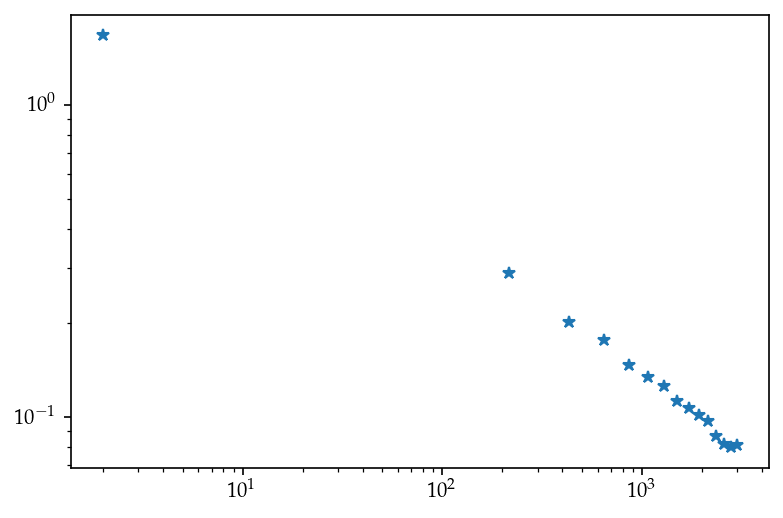

In [156]:
plt.plot(np.linspace(2,3000, 15, dtype=int),  data.iloc[1]["Kerror vs. N"], "*")
plt.xscale("log")
plt.yscale("log")

In [110]:
##Compute margin error and miscalssifications
#data["f pred exact"] = exact_y_pred
margin_err = []
N_star_margin = []
misclass_err = []
for x in tqdm(data.index):
    row = data.loc[x]
    print((row["y train"]*row["f pred exact"]).shape)
    margin_err.append( np.mean(row["y train"]*row["f pred exact"] < 1.0 - 1e-3) )
    misclass_err.append( np.mean(row["y train"]*row["f pred exact"]<0 ) ) 
    N_star_margin.append(N_star_from_df(row["N vs y pred"], margin_err[-1],row["y train"]))
data["margin err"] = margin_err
data["misclass"] = misclass_err
data["N star margin"] = N_star_margin 

  0%|          | 0/40 [00:00<?, ?it/s]

(120,)
N vs Remp-Rstar
[   2  216  430  644  858 1072 1286 1501 1715 1929 2143 2357 2571 2785
 3000]
[ 0.38333333 -0.03333333 -0.05833333 -0.06666667 -0.06666667 -0.06666667
 -0.06666667 -0.06666667 -0.06666667 -0.06666667 -0.06666667 -0.06666667
 -0.06666667 -0.06666667 -0.06666667]
(120,)
N vs Remp-Rstar
[   2  216  430  644  858 1072 1286 1501 1715 1929 2143 2357 2571 2785
 3000]
[ 0.175      -0.18333333 -0.18333333 -0.18333333 -0.18333333 -0.18333333
 -0.18333333 -0.18333333 -0.18333333 -0.18333333 -0.18333333 -0.18333333
 -0.18333333 -0.18333333 -0.18333333]
(120,)
N vs Remp-Rstar
[   2  216  430  644  858 1072 1286 1501 1715 1929 2143 2357 2571 2785
 3000]
[ 0.13333333 -0.24166667 -0.24166667 -0.24166667 -0.24166667 -0.24166667
 -0.24166667 -0.24166667 -0.25       -0.24166667 -0.25       -0.25
 -0.25       -0.25       -0.25      ]
(120,)
N vs Remp-Rstar
[   2  216  430  644  858 1072 1286 1501 1715 1929 2143 2357 2571 2785
 3000]
[ 0.35833333 -0.05833333 -0.10833333 -0.13333333 -

[   2  216  430  644  858 1072 1286 1501 1715 1929 2143 2357 2571 2785
 3000]
[-0.36666667 -0.36666667 -0.36666667 -0.36666667 -0.36666667 -0.36666667
 -0.36666667 -0.36666667 -0.36666667 -0.36666667 -0.36666667 -0.36666667
 -0.36666667 -0.36666667 -0.36666667]
(120,)
N vs Remp-Rstar
[   2  216  430  644  858 1072 1286 1501 1715 1929 2143 2357 2571 2785
 3000]
[-0.38333333 -0.38333333 -0.38333333 -0.38333333 -0.38333333 -0.38333333
 -0.38333333 -0.38333333 -0.38333333 -0.38333333 -0.38333333 -0.38333333
 -0.38333333 -0.38333333 -0.38333333]
(120,)
N vs Remp-Rstar
[   2  216  430  644  858 1072 1286 1501 1715 1929 2143 2357 2571 2785
 3000]
[-0.375 -0.375 -0.375 -0.375 -0.375 -0.375 -0.375 -0.375 -0.375 -0.375
 -0.375 -0.375 -0.375 -0.375 -0.375]
(120,)
N vs Remp-Rstar
[   2  216  430  644  858 1072 1286 1501 1715 1929 2143 2357 2571 2785
 3000]
[-0.35833333 -0.36666667 -0.36666667 -0.36666667 -0.36666667 -0.36666667
 -0.36666667 -0.36666667 -0.36666667 -0.36666667 -0.36666667 -0.366666

,,,N vs y pred,f pred exact,y train,C val,margin err,misclass,N star margin,Kerror vs. N
"kernel,dataset",m train,C,,,,,,,,
"(QAOA,2, Two_Moons)",120,optimal,...,"[-1.0195259485855273, 0.9955891578850797, 0.99...","[-1, 1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -...",2.251361,0.066667,0.000000,198.880000,"[1.9543490846393672, 0.28012750816352594, 0.20..."
"(Circ-Hubr,2, Two_Moons)",120,optimal,...,"[-1.0673709225756076, 1.0001299164674005, 1.00...","[-1, 1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -...",0.620068,0.183333,0.000000,106.511628,"[1.9390283435663676, 0.2781144577794555, 0.209..."
"(Havliscek,2, Two_Moons)",120,optimal,...,"[-1.0370726468849878, 1.062008341292845, 1.045...","[-1, 1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -...",0.620068,0.250000,0.000000,78.088889,"[1.9548007344420721, 0.27720839257046137, 0.19..."
"(Angle,2, Two_Moons)",120,optimal,...,"[-1.1381286818326026, 1.0051789074222017, 0.99...","[-1, 1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -...",2.659184,0.150000,0.000000,186.040000,"[1.9334529846692656, 0.2777506917410889, 0.205..."
"(Angle, Generated)",120,optimal,...,"[0.9996068622092524, 1.0407913472043282, 0.999...","[1.0, 1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1...",2.047449,0.050000,0.000000,430.000000,"[1.7997946596116192, 0.28319957370188126, 0.20..."
"(Circ-Hubr, Generated)",120,optimal,...,"[0.9997396271680881, -0.9996850016718264, -1.8...","[1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1...",2.251361,0.125000,0.000000,399.428571,"[1.6151040538590484, 0.3167670948813982, 0.216..."
"(Havliscek, Generated)",120,optimal,...,"[-1.0003006489389001, -0.9999717994260411, -1....","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0,...",1.435714,0.100000,0.000000,311.111111,"[1.2334897263117666, 0.29001759501739, 0.20969..."
"(QAOA, Generated)",120,optimal,...,"[-0.9998374562500818, -0.9999496223682, -1.000...","[-1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, ...",1.231803,0.250000,0.000000,138.595745,"[1.6668262626113255, 0.28829041637344666, 0.20..."
"(QAOA, Two_Moons)",120,optimal,...,"[-1.3671447086202027, 0.9366113054844601, 0.95...","[-1, 1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -...",0.416156,0.516667,0.016667,2.000000,"[1.9363128483438583, 0.28018177862060467, 0.19..."


In [41]:
#data["exact f pred"] = exact_y_pred
margin_err = []
misclass_err = []
for x in tqdm(data.index):
    row = data.loc[x]
    print((row["y train"]*row["exact f pred"]).shape)
    margin_err.append( np.mean(row["y train"]*row["exact f pred"] < 1.0 - 1e-3) )
    misclass_err.append( np.mean(row["y train"]*row["exact f pred"]<0 ) ) 
data["margin err"] = margin_err
data["misclass"] = misclass_err

,,,N vs y pred,y train,C val,exact f pred,margin err,misclass
"kernel,dataset",m train,C,,,,,,
"(Havliscek, Two_Moons)",60,5,...,"[-1, 1, 1, -1, -1, -1, 1, 1, 1, -1, -1, -1, 1,...",5.000000,"[-1.0416646563026204, 0.43155088536066155, 0.9...",0.300000,0.133333
"(Circ-Hubr, Generated)",60,optimal,...,"[1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1...",1.850340,"[0.9996400306345736, -1.0000368833464717, -1.3...",0.150000,0.000000
"(Angle, Two_Moons)",60,optimal,...,"[-1, 1, 1, -1, -1, -1, 1, 1, 1, -1, -1, -1, 1,...",0.831633,"[-0.9171192534355459, 0.12178806747153621, 0.6...",0.466667,0.166667
"(QAOA,2, Two_Moons)",60,5,...,"[-1, 1, 1, -1, -1, -1, 1, 1, 1, -1, -1, -1, 1,...",5.000000,"[-1.3035554813285406, 1.2308586732457023, 0.99...",0.016667,0.000000
"(QAOA, Two_Moons)",60,1,...,"[-1, 1, 1, -1, -1, -1, 1, 1, 1, -1, -1, -1, 1,...",1.000000,"[-1.5211716297758773, 1.725995966408767, 0.999...",0.183333,0.000000
"(Angle,2, Two_Moons)",60,1/sqrt(m),...,"[-1, 1, 1, -1, -1, -1, 1, 1, 1, -1, -1, -1, 1,...",0.129099,"[-0.8158751066330927, 0.07509604910251186, 0.6...",0.800000,0.166667
"(QAOA, Generated)",60,optimal,...,"[-1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, ...",2.257823,"[-0.999902324178746, -0.9999898523851993, -1.0...",0.016667,0.000000
"(Havliscek, Generated)",60,1,...,"[-1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, -1.0,...",1.000000,"[-1.0001449242841773, -0.9998821847425854, -0....",0.550000,0.000000
"(Angle,2, Two_Moons)",60,5,...,"[-1, 1, 1, -1, -1, -1, 1, 1, 1, -1, -1, -1, 1,...",5.000000,"[-1.1110742619809721, 1.2690256095241614, 0.89...",0.166667,0.000000


,,,,N star,emp risk,C val
"kernel,dataset",m train,Remp eps,C,,,
"(QAOA, Two_Moons)",120,"(relative, 0.05)",1/sqrt(m),135.263636,0.184583,0.091287
"(Havliscek, Two_Moons)",120,"(relative, 0.05)",1/sqrt(m),4.140000,0.216250,0.091287
"(Angle, Two_Moons)",120,"(relative, 0.05)",1/sqrt(m),76.900000,0.224167,0.091287
"(Circ-Hubr, Two_Moons)",120,"(relative, 0.05)",1/sqrt(m),104.244444,0.255833,0.091287
"(Havliscek, Generated)",120,"(relative, 0.05)",1/sqrt(m),2.000000,0.485417,0.091287
"(QAOA, Generated)",120,"(relative, 0.05)",1/sqrt(m),2.000000,0.485417,0.091287
"(Angle, Generated)",120,"(relative, 0.05)",1/sqrt(m),2.000000,0.485417,0.091287
"(Circ-Hubr, Generated)",120,"(relative, 0.05)",1/sqrt(m),2.000000,0.493333,0.091287
"(QAOA, Checkerboard)",120,"(relative, 0.05)",1/sqrt(m),2.000000,0.501250,0.091287


In [49]:
d1 = data.loc[:,[120],[("margin", 0.5)],["1/sqrt(m)"]] 
d1.sort_values(["emp risk"])

,,,,N star,emp risk,C val
"kernel,dataset",m train,Remp eps,C,,,
"(Havliscek, Two_Moons)",120,"(margin, 0.5)",1/sqrt(m),2.0,0.316667,0.091287
"(Angle, Two_Moons)",120,"(margin, 0.5)",1/sqrt(m),2.0,0.316667,0.091287
"(QAOA, Two_Moons)",120,"(margin, 0.5)",1/sqrt(m),2.0,0.366667,0.091287
"(Angle, Generated)",120,"(margin, 0.5)",1/sqrt(m),2.0,0.458333,0.091287
"(QAOA, Generated)",120,"(margin, 0.5)",1/sqrt(m),216.0,0.458333,0.091287
"(Havliscek, Generated)",120,"(margin, 0.5)",1/sqrt(m),216.0,0.458333,0.091287
"(Circ-Hubr, Generated)",120,"(margin, 0.5)",1/sqrt(m),1.0,0.466667,0.091287
"(Circ-Hubr, Two_Moons)",120,"(margin, 0.5)",1/sqrt(m),2.0,0.466667,0.091287
"(Havliscek, Checkerboard)",120,"(margin, 0.5)",1/sqrt(m),2.0,0.475000,0.091287


In [50]:
d1 = data.loc[:,[120],[("margin", 0.5)],[1]] 
d1.sort_values(["emp risk"])

,,,,N star,emp risk,C val
"kernel,dataset",m train,Remp eps,C,,,
"(Angle, Generated)",120,"(margin, 0.5)",1,644.000000,0.016667,1.0
"(QAOA, Two_Moons)",120,"(margin, 0.5)",1,203.411765,0.041667,1.0
"(Havliscek, Generated)",120,"(margin, 0.5)",1,572.666667,0.041667,1.0
"(QAOA, Generated)",120,"(margin, 0.5)",1,203.160000,0.108333,1.0
"(Circ-Hubr, Generated)",120,"(margin, 0.5)",1,195.619048,0.166667,1.0
"(Havliscek, Two_Moons)",120,"(margin, 0.5)",1,180.333333,0.200000,1.0
"(Angle, Two_Moons)",120,"(margin, 0.5)",1,175.875000,0.216667,1.0
"(Circ-Hubr, Two_Moons)",120,"(margin, 0.5)",1,160.971429,0.250000,1.0
"(Circ-Hubr, Checkerboard)",120,"(margin, 0.5)",1,2.000000,0.475000,1.0


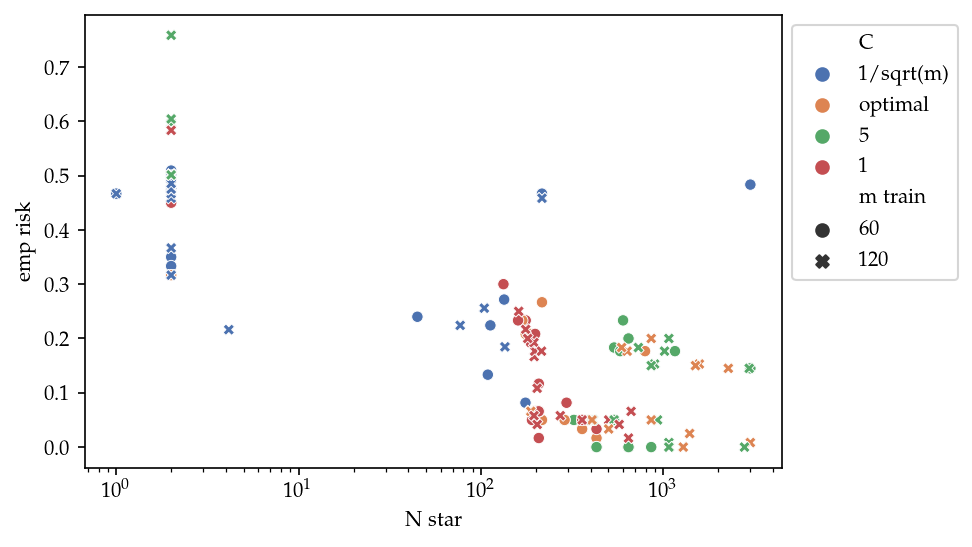

In [52]:
sns.scatterplot(data =  data,
x= "N star", y="emp risk", palette="deep", style = "m train", hue =  "C", s = 30)
plt.xscale("log")
plt.legend(loc='upper left', bbox_to_anchor=(1,1))

In [10]:
data.xs(120, level = "m_train")

,,,N_star,emp_risk
"kernel,dataset",Remp_eps,C,,
"(Havliscek, Generated)","(margin, 0.5)",1/sqrt(m),216.000000,0.458333
"(QAOA, Checkerboard)","(margin, 0.5)",5,2.000000,0.583333
"(Circ-Hubr, Two_Moons)","(margin, 0.5)",5,1072.000000,0.200000
"(Havliscek, Checkerboard)","(relative, 0.05)",1/sqrt(m),2.000000,0.501250
"(QAOA, Generated)","(relative, 0.05)",1/sqrt(m),2.000000,0.485417
"(Havliscek, Two_Moons)","(margin, 0.5)",1/sqrt(m),2.000000,0.316667
"(Circ-Hubr, Two_Moons)","(relative, 0.05)",5,2957.000000,0.145000
"(QAOA, Two_Moons)","(margin, 0.5)",5,1072.000000,0.008333
"(Havliscek, Generated)","(relative, 0.05)",1/sqrt(m),2.000000,0.485417
